In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.batches as batches

from lsst.sims.maf.plots import PlotHandler
import healpy as hp

In [2]:
colmap = batches.ColMapDict('barebones')
colmap['ra'] = 'RA'
colmap['seeingEff'] = 'FWHMeff'
colmap['seeingGeom'] = 'FWHM_geometric'

In [3]:

outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)
conn = db.Database('feature_baseline_10yrs.db', defaultTable='observations')

In [12]:
sql = 'note ="" or note="scripted"'
slicer = slicers.HealpixSlicer(nside=64, latCol='dec', lonCol='RA')
metric = metrics.CountMetric(col='mjd')

bundleList = []
bundleList.append(metricBundles.MetricBundle(metric, slicer, sql))



Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database observations with constraint note ="" or note="scripted" for columns ['RA', 'dec', 'mjd']
Found 2140178 visits
Running:  ['opsim_Count_mjd_note_or_notescripted_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note ="" or note="scripted"" constraint now.
monopole: 652.522  dipole: lon: -86.0182, lat: -89.6389, amp: 272.685
Plotting complete.


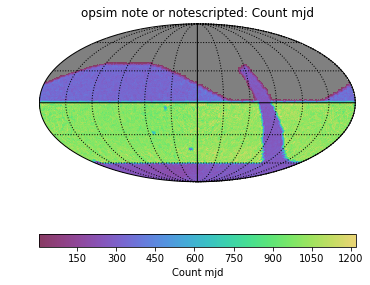

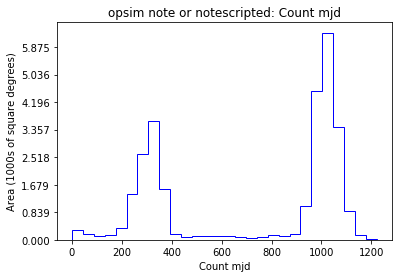

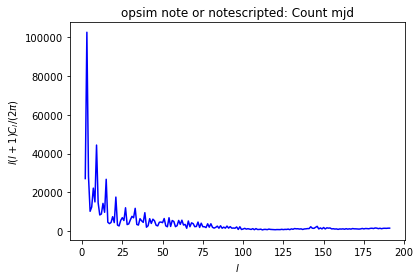

In [13]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)